# 모든 Imbalanced Data를 다루기 위해 SMOTE 그만 사용하기

출처: [https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be](https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be)

# Stop using SMOTE to handle all your Imbalanced Data

**Stop using SMOTE to handle all your Imbalanced Data**

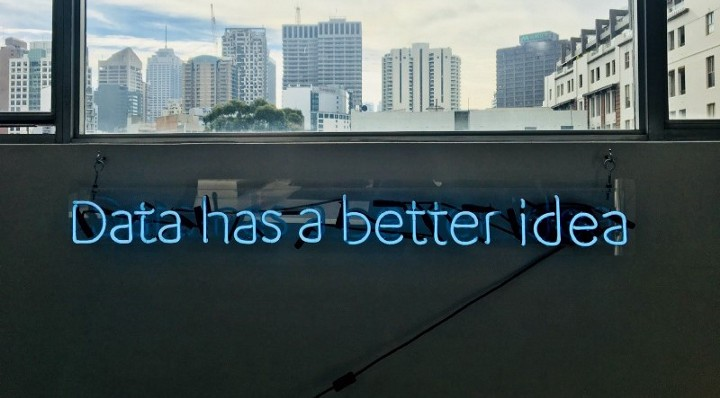

classification task에서 target class label이 균등하게 분포되지 않는 상황이 발생할 수 있습니다. 이러한 dataset를 imbalanced라고 할 수 있습니다. data의 imbalance는 data science model을 학습시키는 데 장애가 될 수 있습니다. imbalance class 문제의 경우, model은 주로 다수의 class에 대해 학습되고 모델은 다수의 class 예측으로 편향됩니다.

따라서, modeling pipeline을 진행하기 전에 class imbalance를 처리하는 것이 필수적입니다. minority class의 새로운 샘플을 생성하거나 majority class의 일부 샘플을 제거하여 class imbalance 문제를 해결하는 다양한 class balancing technique이 있고, 이는 크게 두 가지 category로 분류할 수 있습니다:

- **Over-sampling tecniques:** Oversampling tecnique은 가상의 minority class point를 생성하는 것을 의미합니다. 이러한 tecnique의 예로는 Random Over Sampling, ADASYN, SMOTE 등이 있습니다.

- **Under-sampling tecniques:** Undersampling technique은 majority class point를 제거하는 것을 의미합니다. 이러한 technique의 예로는 ENN, Random Under Sampling, TomekLinks 등이 있습니다.

Undersampling technique을 사용할 때의 단점은 class의 균형을 맞추기 위해 majority class data point를 많이 제거한다는 것입니다. oversampling technique은 이러한 단점을 커버하지만, minority class 내에서 여러 샘플을 생성하면 모델이 overfitting될 수 있습니다.

# Combination of Oversampling and Undersampling techniques
SMOTE는 유명한 oversampling technique 중 하나이며 class imbalance를 처리하는 데 매우 효과적입니다. 아이디어는 imbalanced class를 처리하는 효율성을 높이기 위해 SMOTE를 일부 undersampling technique(ENN, Tomek)와 결합하는 것입니다.

SMOTE와 undersampling technique의 조합에 대한 두 가지 예는 다음과 같습니다:

- **SMOTE with ENN**

- **SMOTE with Tomek**

SMOTE와 undersampling technique의 combination을 진행하기 전에 SMOTE가 무엇이며 내부에서 어떻게 작동하는지 다뤄 보겠습니다.

# Whats is SMOTE?
SMOTE는 Synthetic Minority Oversampling Technique의 약자로, dataset의 균형을 맞추기 위해 synthetic minority class data point를 생성하는 oversampling technique입니다.

SMOTE는 k-nearest neighbor algorithm을 사용하여 synthetic data point를 생성합니다. SMOTE algorithm의 단계는 다음과 같습니다:

1. minority class vector를 식별합니다.

2. 고려할 가장 가까운 숫자(k)의 수를 결정합니다.

3. minority data point와 neighbors' data point 사이의 선을 계산하고 synthetic point를 배치합니다.

4. data가 균형을 이룰 때까지 모든 minority data point와 k neighbors에 대해 step 3를 반복합니다.

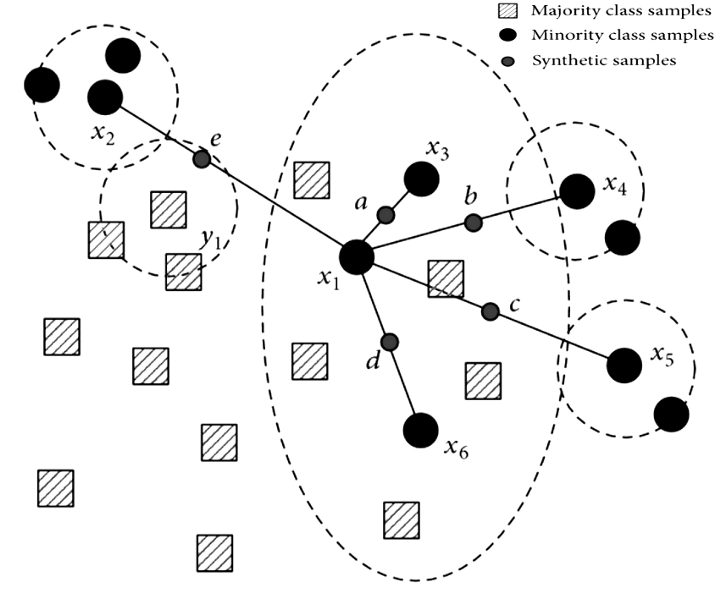

# Combination of SMOTE with Tomek Links
Tomek Links는 서로 가장 가깝지만 다른 class에 속하는 모든 data point pair를 식별하는 undersampling heuristic approach이며 이러한 pair(a와 b를 가정)를 Tomek Links라고 합니다. Tomek Links는 다음 조건을 따릅니다:

- a와 b는 서로 가장 가까운 neighbor입니다.

- a와 b는 두 개의 다른 class에 속합니다.

경험적으로 이러한 Tomek links points(a, b)는 두 class의 boundary of separation에 존재합니다. 따라서, Tomek links points의 majority class를 제거하면 class separation이 증가하고 majority cluster의 경계를 따라 majority class 샘플의 수도 감소합니다.

## Idea
imbalanced dataset의 경우 첫 번째 SMOTE가 적용되어 균형 잡힌 분포를 얻기 위해 새로운 synthetic minority sample을 생성합니다. 또한, Tomek Links는 두 class의 경계에 가까운 샘플을 제거하여 두 class 간의 separation을 높이는 데 사용됩니다.

## Implementation

```python
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X, y = smt.fit_sample(X, y)
```

# Combination of SMOTE with ENN
ENN(Edited Nearest Neighbour)은 KNN algorithm에 의해 만들어진 prediction이  다른 majority class point와 다른 boundary에 있는 majority class의 instance를 제거하는 undersampling technique입니다.

SMOTETomek과 유사하게 먼저 SMOTE를 적용하여 minority class sample의 synthetic data point를 생성한 다음 ENN을 사용하여 boundary의 data point를 제거하여 두 class의 separation을 높입니다.

## Implementation

```python
from imblearn.combine import SMOTEENN

smt = SMOTEENN(random_state=42)
X, y = smt.fit_sample(X, y)
```

# Conclusion
oversampling technique과 undersampling technique을 결합한 방법이 imbalanced data를 다루는데 더 효과적입니다.